In [2]:
!pip install tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
# Hàm xây dựng mô hình tối ưu
def build_model(vocab_size, num_classes, input_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(num_classes, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:
# Hàm vẽ biểu đồ
def plot_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Biểu đồ Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Biểu đồ Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [7]:
# Tạo từ điển ánh xạ với nhóm từ khóa cho mỗi chủ đề
technically = {
    'website': ['website', 'web'],
    'mobile-app': ['mobile app', 'app di động', 'Xây dựng ứng dụng', 'Xây dựng Ứng dụng', 'Ứng dụng di động', 'Phát triển ứng dụng', 'Xây dựng ứng dụng'],
    'game': ['game'],
    'chatbot': ['chatbot', 'chat bot'],
    'artificial-intelligence': ['trí tuệ nhân tạo'],
    'machine-learning': ['machine learning', 'máy học'],
    'deep-learning': ['deep learning', 'học sâu'],
    'computer-vision': ['computer vision', 'thị giác máy tính'],
    'big-data': ['big data', 'dữ liệu lớn', 'bigdata'],
    'data-analysis': ['data analysis', 'phân tích dữ liệu'],
    'cloud-computing': ['cloud computing', 'điện toán đám mây', 'K8s', 'kubernetes'],
    'blockchain': ['blockchain', 'chuỗi khối', 'NFT'],
    'robot': ['robot', 'robotics', 'robotic'],
    'drone': ['drone', 'flycam'],
    'vr': ['vr', 'thực tế ảo', 'virtual reality'],
}

In [8]:
# Hàm phân loại chủ đề
def categorize_project(project_name):
    matched_themes = []
    for theme, keywords in technically.items():
        if any(keyword.lower() in project_name.lower() for keyword in keywords):
            matched_themes.append(theme)
    return ', '.join(matched_themes) if matched_themes else 'other'

In [9]:
# Tải dữ liệu
pd_data = pd.read_csv('D:/Github/DanhgiaDuAnVaNghenghiepTuongLai/dataset/dataset_train_ver1.csv')
df = pd_data[['nameProject_VNI']].copy()
df['category'] = df['nameProject_VNI'].apply(categorize_project)
pd_data

,STT,nameProject_VNI,nameProject_ENG,difficulty_level,codeSememter,major,specialization,university,note
0,1.0,Xây dựng hệ thống quản lý sân cầu lông,NaN,1.0,232.0,NaN,NaN,UIT,NaN
1,2.0,Tìm hiểu công nghệ Web 3.0 và ứng dụng web 3.0...,NaN,1.0,232.0,NaN,NaN,UIT,NaN
2,3.0,Xây dựng hệ thống trợ giúp tư vấn hướng nghiệp...,NaN,1.0,232.0,NaN,NaN,UIT,NaN
3,4.0,Xây dựng mạng xã hội kết hợp chatbot cho người...,NaN,1.0,232.0,NaN,NaN,UIT,NaN
4,5.0,Tìm hiểu Chatbot và xây dựng ứng dụng hỗ trợ t...,NaN,1.0,232.0,NaN,NaN,UIT,NaN
...,...,...,...,...,...,...,...,...,...
609,NaN,Tìm hiểu về BigData,NaN,1.0,232.0,NaN,NaN,HUTECH,Hướng nghiên cứu
610,NaN,Tìm hiểu về Data Warehouse,NaN,1.0,232.0,NaN,NaN,HUTECH,Hướng nghiên cứu
611,NaN,Tìm hiểu phương pháp phân tích tương tác sản p...,NaN,1.0,232.0,NaN,NaN,HUTECH,Hướng nghiên cứu
612,NaN,Tìm hiểu một số phương pháp phân tích dữ liệu ...,NaN,1.0,232.0,NaN,NaN,HUTECH,Hướng nghiên cứu


<Axes: xlabel='count', ylabel='note'>

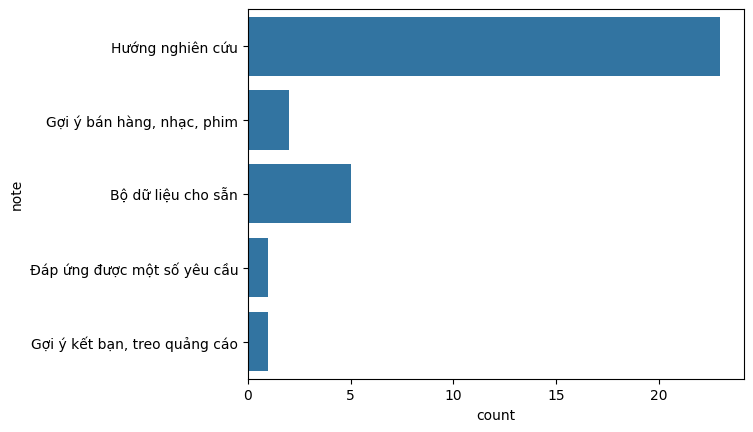

In [10]:
# UIT: Đại học Công nghệ thông tin HCM
# DUT: Đại học Đại học Bách Khoa - Đại học Đà Nẵng
# HCMUS: Đại học Khoa học Tự nhiên - Đại học Quốc gia TP.HCM
import seaborn as sns
sns.countplot(pd_data['note'])

In [11]:
# Số lượng đồ án của từng trường ĐH
pd_data['note'].value_counts()

note
Hướng nghiên cứu                 23
Bộ dữ liệu cho sẵn                5
Gợi ý bán hàng, nhạc, phim        2
Đáp ứng được một số yêu cầu       1
Gợi ý kết bạn, treo quảng cáo     1
Name: count, dtype: int64

In [12]:
# Tạo các cột chỉ báo cho mỗi chủ đề
category_dummies = pd.get_dummies(df['category'].apply(lambda x: x.split(', ')).explode()).groupby(level=0).sum()
df = pd.concat([df, category_dummies], axis=1)

In [13]:
df

,nameProject_VNI,category,artificial-intelligence,big-data,blockchain,chatbot,cloud-computing,computer-vision,data-analysis,deep-learning,drone,game,machine-learning,mobile-app,other,robot,website
0,Xây dựng hệ thống quản lý sân cầu lông,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Tìm hiểu công nghệ Web 3.0 và ứng dụng web 3.0...,website,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Xây dựng hệ thống trợ giúp tư vấn hướng nghiệp...,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Xây dựng mạng xã hội kết hợp chatbot cho người...,chatbot,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,Tìm hiểu Chatbot và xây dựng ứng dụng hỗ trợ t...,"mobile-app, chatbot",0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Tìm hiểu về BigData,big-data,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
610,Tìm hiểu về Data Warehouse,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
611,Tìm hiểu phương pháp phân tích tương tác sản p...,other,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
612,Tìm hiểu một số phương pháp phân tích dữ liệu ...,"machine-learning, data-analysis",0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [14]:
# Lấy văn bản dự án và các nhãn
texts = df['nameProject_VNI'].values
categories = df.columns.difference(['nameProject_VNI', 'category'])
labels = df[categories].values

In [15]:
# Chuẩn bị tokenizer và padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)
data = pad_sequences(sequences, maxlen=max_length)

In [16]:
# Chia dữ liệu thành huấn luyện và thử nghiệm
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [17]:
# Khởi tạo mô hình
model = build_model(10000, len(categories), max_length)

c:\Users\huuth\miniconda3\envs\dacs\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [18]:
# Early stopping và checkpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

In [19]:
# Huấn luyện mô hình
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping, checkpoint])

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.0893 - loss: 0.5777 - val_accuracy: 0.2195 - val_loss: 0.2624
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3042 - loss: 0.2482 - val_accuracy: 0.3821 - val_loss: 0.2028
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.4082 - loss: 0.1997 - val_accuracy: 0.3821 - val_loss: 0.1940
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.3557 - loss: 0.1938 - val_accuracy: 0.3821 - val_loss: 0.1919
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3829 - loss: 0.1824 - val_accuracy: 0.3821 - val_loss: 0.1917
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3888 - loss: 0.1835 - val_accuracy: 0.3821 - val_loss: 0.1915
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.3883 - loss: 0.1794 - val_accuracy: 0.3821 - val_loss: 0.1908
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.3931 - loss: 0.1841 - val_accuracy: 0.

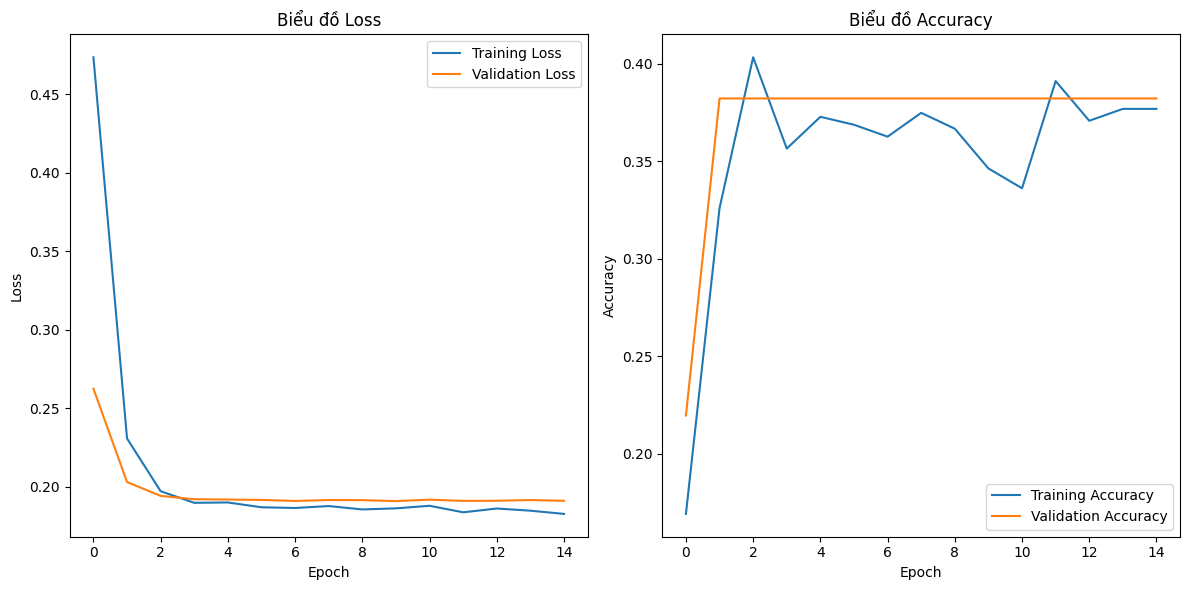

In [20]:
# Vẽ biểu đồ loss và accuracy
plot_history(history)

In [21]:
# Tải lại mô hình tốt nhất
model.load_weights('D:/Github/DanhgiaDuAnVaNghenghiepTuongLai/code_ai/best_model.keras')

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

# Tải dữ liệu
pd_data = pd.read_csv('D:/Github/DanhgiaDuAnVaNghenghiepTuongLai/dataset/dataset_train_ver1.csv')
df = pd_data[['nameProject_VNI']].copy()

# Lấy văn bản dự án và các nhãn
texts = df['nameProject_VNI'].values
categories = df.columns.difference(['nameProject_VNI', 'category'])
labels = df[categories].values

# Hàm xây dựng mô hình tối ưu
def build_model(vocab_size, num_classes, input_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(num_classes, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Chuẩn bị tokenizer và padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
max_length = max(len(seq) for seq in sequences)

# Khởi tạo mô hình
model = build_model(10000, len(categories), max_length)



# Dự đoán trên một dự án ngẫu nhiên
# random_project = "Xây dựng hệ thống chatbot tự động tư vấn tuyển sinh"
# tokenized_project = tokenizer.texts_to_sequences([random_project])
# padded_project = pad_sequences(tokenized_project, maxlen=max_length)

# prediction = model.predict(padded_project)
# predicted_labels = (prediction > 0.5).astype(int)
# predicted_categories = [categories[i] for i, value in enumerate(predicted_labels[0]) if value == 1]

# print("Dự án:", random_project)
# print("Nhãn dự đoán:", predicted_categories)

c:\Users\huuth\miniconda3\envs\dacs\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
c:\Users\huuth\miniconda3\envs\dacs\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 4 objects could not be loaded. Example error message for object <Embedding name=embedding_1, built=False>:

Layer 'embedding_1' was never built and thus it doesn't have any variables. However the weights file lists 1 variables for this layer.
In most cases, this error indicates that either:

1. The layer is owned by a parent layer that implements a `build()` method, but calling the parent's `build()` method did NOT create the state of the child layer 'embedding_1'. A `build()` method must create ALL state for the layer, including the state of any children layers.

2. You need to implement the `def build_from_config(self, config)` method on layer 'embedding_1', to specify how to rebuild it during loading. In this case, you might also want to implement the method that generates the build config at saving time, `def get_build_config(self)`. The method `build_from_config()` is meant to create the state of the layer (i.e. its variables) upon deserialization.

List of objects that could not be loaded:
[<Embedding name=embedding_1, built=False>, <LSTMCell name=lstm_cell, built=False>, <LSTMCell name=lstm_cell, built=False>, <Dense name=dense_1, built=False>]

In [ ]:
# Computer Science - AI
# Xây dựng hệ thống chatbot tự động tư vấn tuyển sinh
# Dự đoán doanh thu bán hàng dựa trên phân tích dữ liệu
# Phân loại cảm xúc trong văn bản tiếng Việt
# Nhận dạng giọng nói và chuyển đổi thành văn bản tiếng Việt
# Hệ thống phát hiện gian lận giao dịch ngân hàng
# Ứng dụng AI trong phân tích y học
# Xây dựng hệ thống đề xuất sản phẩm dựa trên sở thích khách hàng
# Phân loại ảnh và nhận diện đối tượng trong môi trường thực tế
# Hệ thống quản lý học tập thông minh
# Tối ưu hóa lộ trình vận chuyển hàng hóa

# Dùng website để mua đồ chơi cho trẻ
# Dùng website để quản trị nhà máy điện
# Xây dựng ứng dụng để quản lý thiết bị thông minh

In [ ]:
import numpy as np

# Bước 1: Chọn một dự án ngẫu nhiên
# random_project = df['nameProject_VNI'].sample(1).iloc[0]
random_project = "Xây dựng ứng dụng để quản lý thiết bị thông minh"

print("Dự án được chọn để dự đoán:", random_project)

# Bước 2: Chuẩn bị dữ liệu để dự đoán
# Tokenize và Pad văn bản của dự án được chọn
tokenized_project = tokenizer.texts_to_sequences([random_project])
padded_project = pad_sequences(tokenized_project, maxlen=max_length)

# Bước 3: Dự đoán
prediction = model.predict(padded_project)
predicted_labels = (prediction > 0.5).astype(int)

# Lấy các nhãn dự đoán
predicted_categories = [categories[i] for i, value in enumerate(predicted_labels[0]) if value == 1]
print("Nhãn dự đoán:", predicted_categories)

Dự án được chọn để dự đoán: Xây dựng ứng dụng để quản lý thiết bị thông minh


: 